In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] =(20,10)

In [2]:
df1 = pd.read_csv("Karachi_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Gulistan-e-Johar,2 BHK,Coomee,1056,2.0,1.0,89.07
1,Plot Area,Ready To Move,Malir Halt,4 Bedroom,Theanmp,2600,5.0,3.0,170.00
2,Built-up Area,Ready To Move,Saudabad,3 BHK,NaN,1440,2.0,3.0,112.00
3,Super built-up Area,Ready To Move,Shah Faisal Town,3 BHK,Soiewre,1521,3.0,1.0,145.00
4,Super built-up Area,Ready To Move,Kala Board,2 BHK,NaN,1200,2.0,1.0,101.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
df2.shape

(13320, 5)

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 5)

In [13]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

<ipython-input-13-681cf3aca53d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
2+3

5

In [16]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Saddar Town,4 BHK,2100 - 2850,4.0,236.000,4
122,Bin Qasim Town,4 BHK,3067 - 8156,4.0,527.000,4
137,8th Phase Karsaz,2 BHK,1042 - 1105,2.0,104.005,2
165,Model Colony,2 BHK,1145 - 1340,2.0,93.490,2
188,Naya Nazmiabad,2 BHK,1015 - 1540,2.0,106.800,2
410,Memon Goth,1 BHK,34.46Sq. Meter,1.0,68.500,1
549,Tariq Road,2 BHK,1195 - 1440,2.0,113.770,2
648,Pak Colony,9 Bedroom,4125Perch,9.0,315.000,9
661,Saddar Town,2 BHK,1120 - 1145,2.0,98.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,495.000,4


In [17]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [18]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Gulistan-e-Johar,2 BHK,1056.0,2.0,89.07,2
1,Malir Halt,4 Bedroom,2600.0,5.0,170.00,4


In [19]:
df4.loc[30]


location      Saddar Town
size                4 BHK
total_sqft         2475.0
bath                  4.0
price               236.0
bhk                     4
Name: 30, dtype: object

In [20]:
(2100+2850)/2

2475.0

In [21]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Gulistan-e-Johar,2 BHK,1056.0,2.0,89.07,2,8434.659091
1,Malir Halt,4 Bedroom,2600.0,5.0,170.00,4,6538.461538
2,Saudabad,3 BHK,1440.0,2.0,112.00,3,7777.777778
3,Shah Faisal Town,3 BHK,1521.0,3.0,145.00,3,9533.201841
4,Kala Board,2 BHK,1200.0,2.0,101.00,2,8416.666667


In [22]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     1.243231e+04
std      1.512931e+05
min      3.634833e+02
25%      8.208800e+03
50%      9.414855e+03
75%      1.126357e+04
max      1.700000e+07
Name: price_per_sqft, dtype: float64

In [23]:
df5.to_csv("bhp.csv",index=False)

In [24]:
 df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Korangi                   533
Model Colony  Road        392
Electronic City           304
Water Pump                264
FB Area                   235
                         ... 
Bhattarahalli               1
K R C Kala Board            1
Ramanagara Channapatna      1
Gopal Reddy Layout          1
Sonam Layout                1
Name: location, Length: 1264, dtype: int64

In [25]:
location_stats.values.sum()

13200

In [26]:
len(location_stats[location_stats>10])

229

In [27]:
len(location_stats)

1264

In [28]:
len(location_stats[location_stats<=10])

1035

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Dodsworth Layout          10
Kalkere                   10
BTM 1st Stage             10
Hanifabad                 10
Naganathapura             10
                          ..
Bhattarahalli              1
K R C Kala Board           1
Ramanagara Channapatna     1
Gopal Reddy Layout         1
Sonam Layout               1
Name: location, Length: 1035, dtype: int64

In [30]:
len(df5.location.unique())

1264

In [31]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

230

In [32]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,2 BHK,1056.0,2.0,89.07,2,8434.659091
1,other,4 Bedroom,2600.0,5.0,170.00,4,6538.461538
2,other,3 BHK,1440.0,2.0,112.00,3,7777.777778
3,other,3 BHK,1521.0,3.0,145.00,3,9533.201841
4,Kala Board,2 BHK,1200.0,2.0,101.00,2,8416.666667
5,Korangi,2 BHK,1170.0,2.0,88.00,2,7521.367521
6,Old Airport Road,4 BHK,2732.0,4.0,254.00,4,9297.218155
7,Bahria Town,4 BHK,3300.0,4.0,650.00,4,19696.969697
8,Drigh Road,3 BHK,1310.0,3.0,113.25,3,8645.038168
9,other,6 Bedroom,1020.0,6.0,420.00,6,41176.470588


df4 = df3.copy()
df4['total_sqft']= df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

In [33]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,420.0,6,41176.470588
45,Kemari,8 Bedroom,600.0,9.0,250.0,8,41666.666667
58,Lyari Town,6 Bedroom,1407.0,4.0,200.0,6,14214.641080
68,Mosamiyaat,8 Bedroom,1350.0,7.0,135.0,8,10000.000000
70,other,3 Bedroom,500.0,3.0,150.0,3,30000.000000


In [34]:
df5.shape

(13200, 7)

In [35]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [36]:
df6.price_per_sqft.describe()


count     12456.000000
mean      10161.376274
std        4110.195158
min         363.483318
25%        8133.333333
50%        9277.863782
75%       10800.187970
max      188235.294118
Name: price_per_sqft, dtype: float64

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10142, 7)

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk.total_sqft,bhk2.price,color='blue',label='2 BB', s=50)
    plt.scatter(bhk.total_sqft,bhk3.price,marker='+', color='green',label='3 BB', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh PKR Rupees)")
    plt.title(location)
    plt.legend()
    
    

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(6016, 7)

Text(0, 0.5, 'Count')

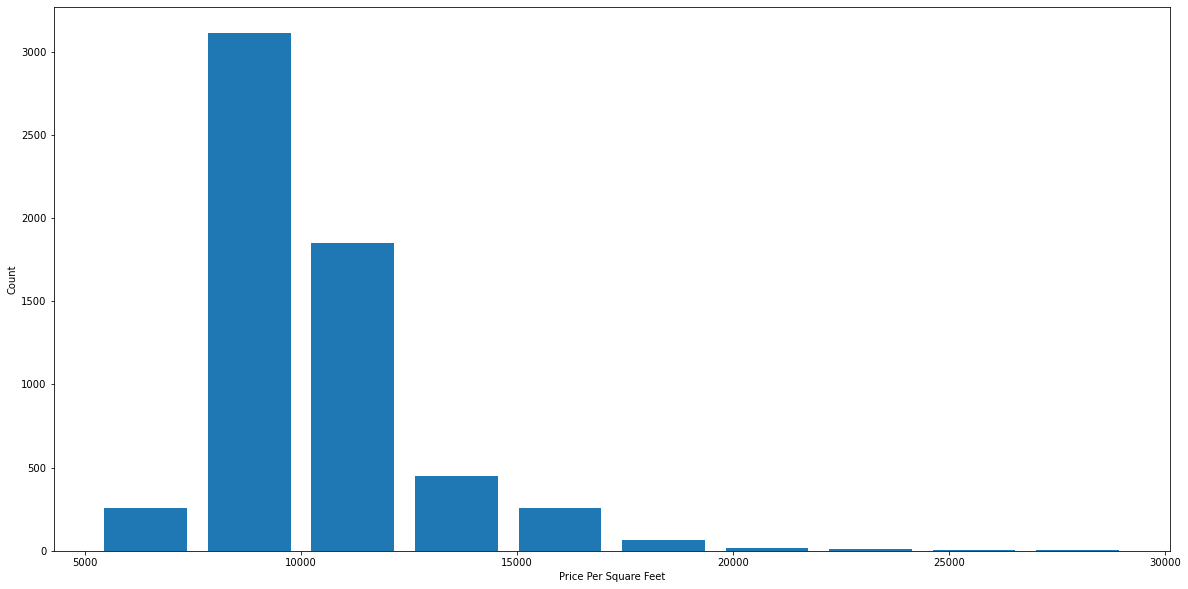

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 14., 16., 13.])

Text(0, 0.5, 'Count')

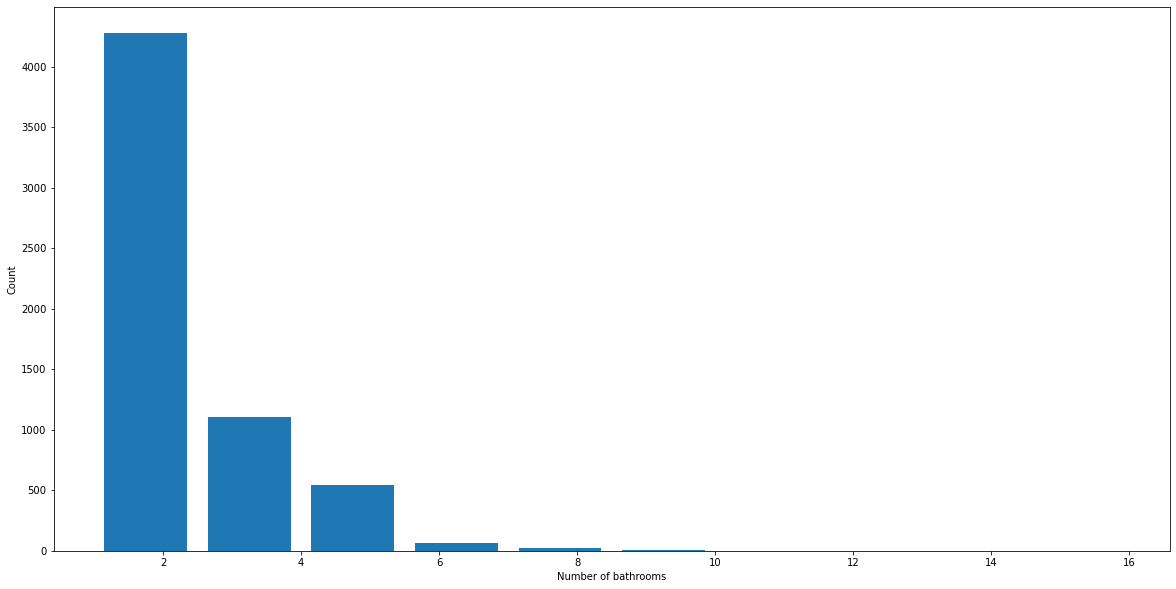

In [42]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [43]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8078,other,9 Bedroom,3300.0,14.0,550.0,9,16666.666667
8507,other,16 BHK,10000.0,16.0,600.0,16,6000.000000
9548,other,13 BHK,5425.0,13.0,325.0,13,5990.783410


In [44]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1287,Chikkabanavar,4 Bedroom,2460.0,7.0,130.0,4,5284.552846
2269,FB Area,3 BHK,1806.0,6.0,166.0,3,9191.583610
5475,Nagasandra,4 Bedroom,7000.0,8.0,500.0,4,7142.857143
8078,other,9 Bedroom,3300.0,14.0,550.0,9,16666.666667


In [45]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(5959, 7)

In [46]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Gulzar-e-Hijri,4 BHK,2850.0,4.0,478.0,4,16771.929825
1,1st Block Gulzar-e-Hijri,3 BHK,1630.0,3.0,244.0,3,14969.325153


In [47]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Gulzar-e-Hijri,2850.0,4.0,478.0,4
1,1st Block Gulzar-e-Hijri,1630.0,3.0,244.0,3
2,1st Block Gulzar-e-Hijri,1875.0,2.0,285.0,3


In [48]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Gulzar-e-Hijri,1st Phase Karsaz,2nd Phase Judicial Layout,2nd Stage MehranArea,5th Block Hyderi,5th Phase Karsaz,6th Phase Karsaz,8th Phase Karsaz,9th Phase Karsaz,ABHKasi Shaheed,...,Vasanthapura,ViGulzar-e-Hijri,Vishveshwarya Layout,Water Pump,Yelachenahalli,Yelenahalli,Yousuf Goth,Yousuf Goth Road,Zaman Town,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Gulzar-e-Hijri,1st Phase Karsaz,2nd Phase Judicial Layout,2nd Stage MehranArea,5th Block Hyderi,...,Ulsoor,Vasanthapura,ViGulzar-e-Hijri,Vishveshwarya Layout,Water Pump,Yelachenahalli,Yelenahalli,Yousuf Goth,Yousuf Goth Road,Zaman Town
0,1st Block Gulzar-e-Hijri,2850.0,4.0,478.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Gulzar-e-Hijri,1630.0,3.0,244.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Gulzar-e-Hijri,1875.0,2.0,285.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Gulzar-e-Hijri,1200.0,2.0,180.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Gulzar-e-Hijri,1235.0,2.0,198.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Gulzar-e-Hijri,1st Phase Karsaz,2nd Phase Judicial Layout,2nd Stage MehranArea,5th Block Hyderi,5th Phase Karsaz,...,Ulsoor,Vasanthapura,ViGulzar-e-Hijri,Vishveshwarya Layout,Water Pump,Yelachenahalli,Yelenahalli,Yousuf Goth,Yousuf Goth Road,Zaman Town
0,2850.0,4.0,478.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,244.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12.shape

(5959, 233)

In [52]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Gulzar-e-Hijri,1st Phase Karsaz,2nd Phase Judicial Layout,2nd Stage MehranArea,5th Block Hyderi,5th Phase Karsaz,6th Phase Karsaz,...,Ulsoor,Vasanthapura,ViGulzar-e-Hijri,Vishveshwarya Layout,Water Pump,Yelachenahalli,Yelenahalli,Yousuf Goth,Yousuf Goth Road,Zaman Town
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X.shape

(5959, 232)

In [54]:
y = df12.price
y.head(3)

0    478.0
1    244.0
2    285.0
Name: price, dtype: float64

In [55]:
len(y)

5959

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9080638453529885

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.88543969, 0.87040413, 0.90559735, 0.90981748, 0.89804795])

In [59]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.893861,{'normalize': False}
1,lasso,0.799494,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.812423,"{'criterion': 'mse', 'splitter': 'best'}"


In [60]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [61]:
predict_price('1st Phase Karsaz',1000, 3, 3)

116.9387780634531

In [62]:
predict_price('1st Phase Karsaz',1000, 3, 3)

116.9387780634531

In [63]:
predict_price('1st Phase Karsaz',1000, 2, 2)

125.53243615871219

In [64]:
predict_price('1st Phase Karsaz',1000, 3, 3)

116.9387780634531

In [65]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [66]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))